In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df =pd.read_csv('/home/fergg/portfolio/TensorFlow_FILES/DATA/stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,47.676174,0.111509,0.052159,106.405639,30.054684,0.018854
std,18.732941,0.314766,0.222351,45.272453,7.193951,0.136013
min,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,32.000000,0.000000,0.000000,77.630000,25.000000,0.000000
50%,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000


In [5]:
sns.set_style('darkgrid')

<Axes: xlabel='stroke', ylabel='count'>

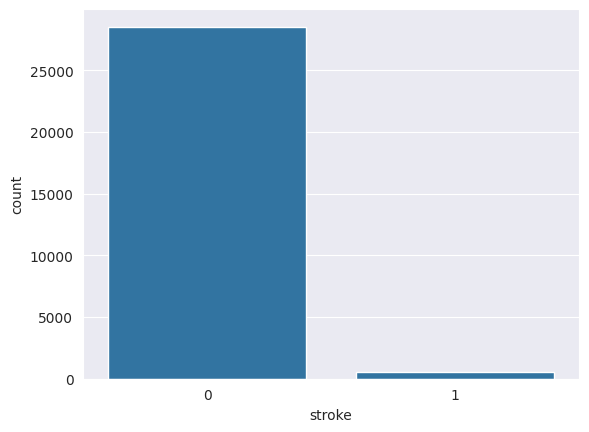

In [6]:
sns.countplot(x=df['stroke'])

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='work_type', ylabel='count'>

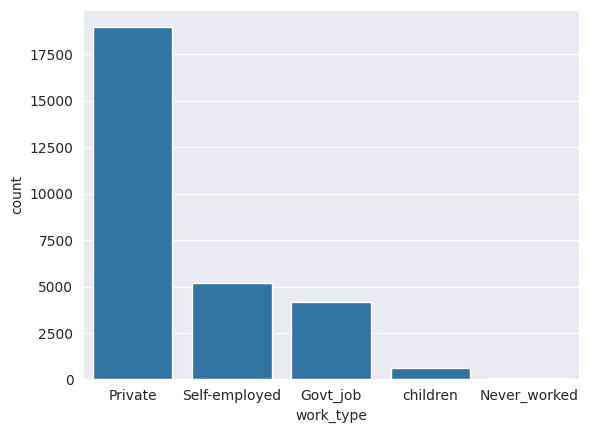

In [8]:
sns.countplot(x=df['work_type'])

<Axes: xlabel='age', ylabel='avg_glucose_level'>

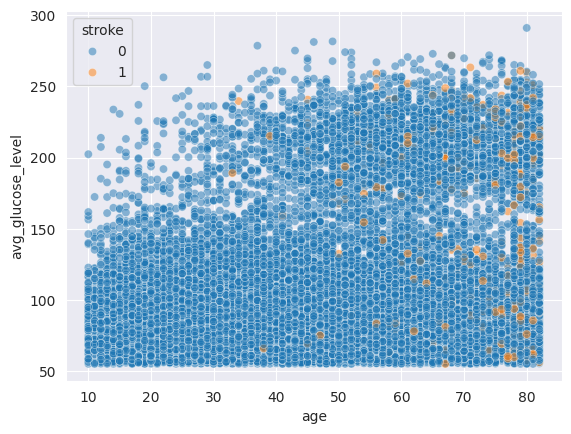

In [9]:
sns.scatterplot(y=df['avg_glucose_level'], x=df['age'], alpha=0.5, hue=df['stroke'])

<Axes: xlabel='bmi', ylabel='age'>

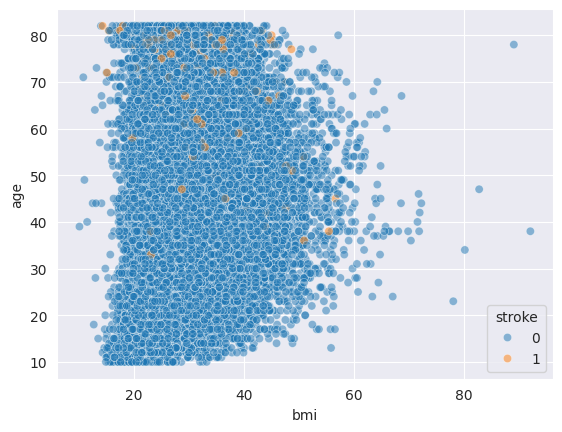

In [10]:
sns.scatterplot(x=df['bmi'], y=df['age'], alpha=0.5, hue=df['stroke'])

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [12]:
male =pd.get_dummies(df['gender'], drop_first=True, dtype=int)
df['gender'] = male

In [13]:

ht = pd.get_dummies(df[['work_type','Residence_type','smoking_status', 'ever_married']], drop_first=True, dtype=int)

In [14]:
ht

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes
0,0,1,0,0,1,1,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,1
4,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
29060,0,0,0,1,1,1,0,0
29061,0,0,0,0,1,0,0,1
29062,0,1,0,0,1,0,0,1
29063,0,1,0,0,1,1,0,1


In [15]:
df = pd.concat([df,ht], axis=1)

In [16]:
df = df.drop(['ever_married',
       'work_type', 'Residence_type', 'smoking_status'], axis=1)

In [17]:
df.corr()['stroke'].sort_values(ascending=False)

stroke                         1.000000
age                            0.154059
heart_disease                  0.105142
hypertension                   0.078674
avg_glucose_level              0.075447
work_type_Self-employed        0.048088
ever_married_Yes               0.047724
gender                         0.012257
Residence_type_Urban           0.001962
smoking_status_smokes         -0.003321
bmi                           -0.004039
work_type_Never_worked        -0.008186
work_type_children            -0.020381
smoking_status_never smoked   -0.020755
work_type_Private             -0.024582
Name: stroke, dtype: float64

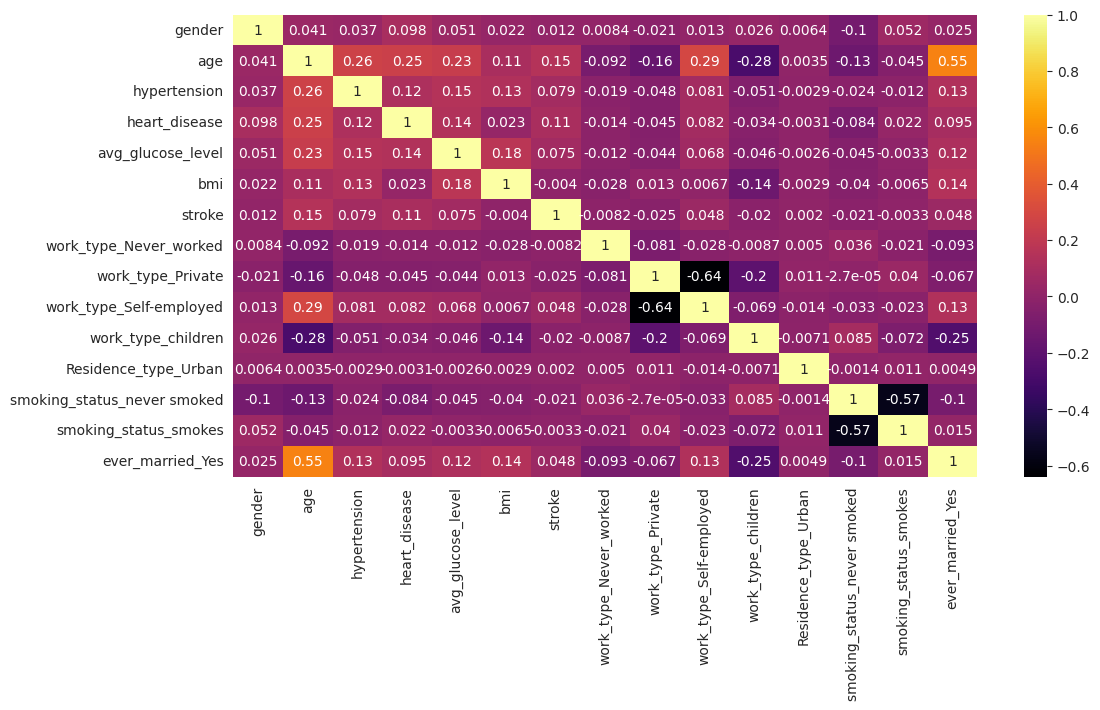

In [18]:

sns.heatmap(df.corr(), cmap='inferno', annot=True)
plt.gcf().set_size_inches(12,6)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('stroke', axis=1).values
y= df['stroke'].values

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [88]:
rus = RandomUnderSampler(sampling_strategy=0.6)
X_res, y_res = rus.fit_resample(X,y)

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, random_state=42, train_size=0.3)

<Axes: xlabel='age', ylabel='Count'>

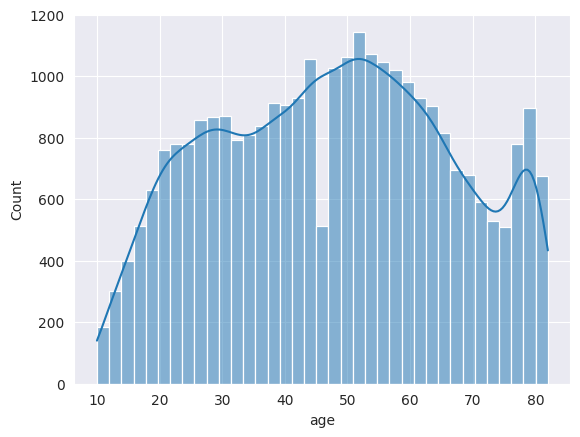

In [90]:
sns.histplot(x=df['age'] ,kde=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

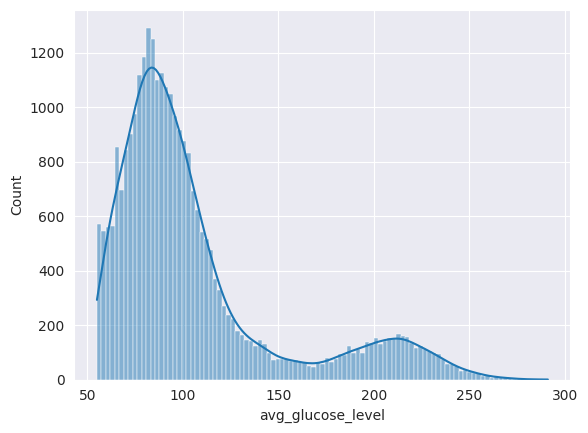

In [91]:
sns.histplot(x=df['avg_glucose_level'] ,kde=True)

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
mm = MinMaxScaler()

X_train =mm.fit_transform(X_train)
X_test =mm.transform(X_test)

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [162]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='val_loss')
model = Sequential()
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy')
model.fit(X_train,y_train, epochs=1000,validation_data=(X_test,y_test), callbacks=[early_stop])


Epoch 1/1000
16/16 [==============================] - 3s 59ms/step - loss: 0.6749 - val_loss: 0.6634
Epoch 2/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.6723 - val_loss: 0.6596
Epoch 3/1000
16/16 [==============================] - 0s 30ms/step - loss: 0.6699 - val_loss: 0.6568
Epoch 4/1000
16/16 [==============================] - 1s 34ms/step - loss: 0.6681 - val_loss: 0.6544
Epoch 5/1000
16/16 [==============================] - 1s 33ms/step - loss: 0.6666 - val_loss: 0.6519
Epoch 6/1000
16/16 [==============================] - 0s 28ms/step - loss: 0.6650 - val_loss: 0.6499
Epoch 7/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.6636 - val_loss: 0.6478
Epoch 8/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.6624 - val_loss: 0.6458
Epoch 9/1000
16/16 [==============================] - 0s 29ms/step - loss: 0.6612 - val_loss: 0.6447
Epoch 10/1000
16/16 [==============================] - 0s 29ms/step - loss: 0.6605 - val_lo

In [163]:
p=pd.DataFrame(model.history.history)

<Axes: >

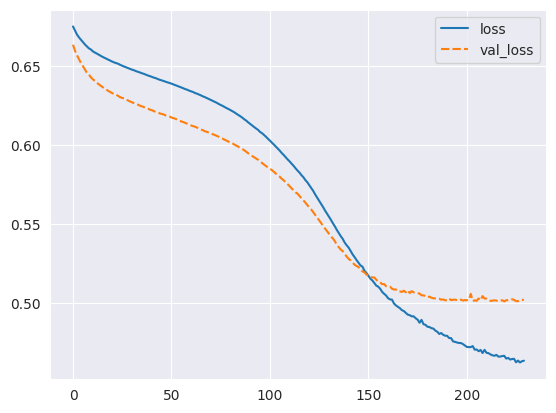

In [164]:
sns.lineplot(data=p)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
predictions = model.predict(X_test)

36/36 [==============================] - 0s 4ms/step


In [166]:
pred = (predictions > 0.5).astype(int)

In [167]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       781
           1       0.58      0.70      0.64       370

    accuracy                           0.74      1151
   macro avg       0.71      0.73      0.72      1151
weighted avg       0.76      0.74      0.75      1151



In [168]:
print(confusion_matrix(y_test,pred))

[[593 188]
 [110 260]]


In [205]:
early_stop = EarlyStopping(patience=20, verbose=1, monitor='val_loss')
model = Sequential()
model.add(Dense(15, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
optimizer = SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy')
model.fit(X_train,y_train, epochs=1000,validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/1000
16/16 [==============================] - 7s 93ms/step - loss: 0.6398 - val_loss: 0.6151
Epoch 2/1000
16/16 [==============================] - 1s 34ms/step - loss: 0.6151 - val_loss: 0.5459
Epoch 3/1000
16/16 [==============================] - 1s 39ms/step - loss: 0.5806 - val_loss: 0.5514
Epoch 4/1000
16/16 [==============================] - 1s 35ms/step - loss: 0.5458 - val_loss: 0.7103
Epoch 5/1000
16/16 [==============================] - 1s 33ms/step - loss: 0.5549 - val_loss: 0.5105
Epoch 6/1000
16/16 [==============================] - 1s 33ms/step - loss: 0.5277 - val_loss: 0.5036
Epoch 7/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.5227 - val_loss: 0.5326
Epoch 8/1000
16/16 [==============================] - 0s 28ms/step - loss: 0.5107 - val_loss: 0.5340
Epoch 9/1000
16/16 [==============================] - 7s 498ms/step - loss: 0.4978 - val_loss: 0.5111
Epoch 10/1000
16/16 [==============================] - 0s 31ms/step - loss: 0.5103 - val_l

In [206]:
predictions = model.predict(X_test)

36/36 [==============================] - 0s 4ms/step


In [207]:
pred = (predictions > 0.5).astype(int)

In [208]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       781
           1       0.59      0.76      0.67       370

    accuracy                           0.75      1151
   macro avg       0.73      0.76      0.74      1151
weighted avg       0.78      0.75      0.76      1151



In [209]:
print(confusion_matrix(y_test,pred))

[[587 194]
 [ 89 281]]
